

Left Click to add a Helicopter, Right Click to add a Car


<IPython.core.display.Javascript object>


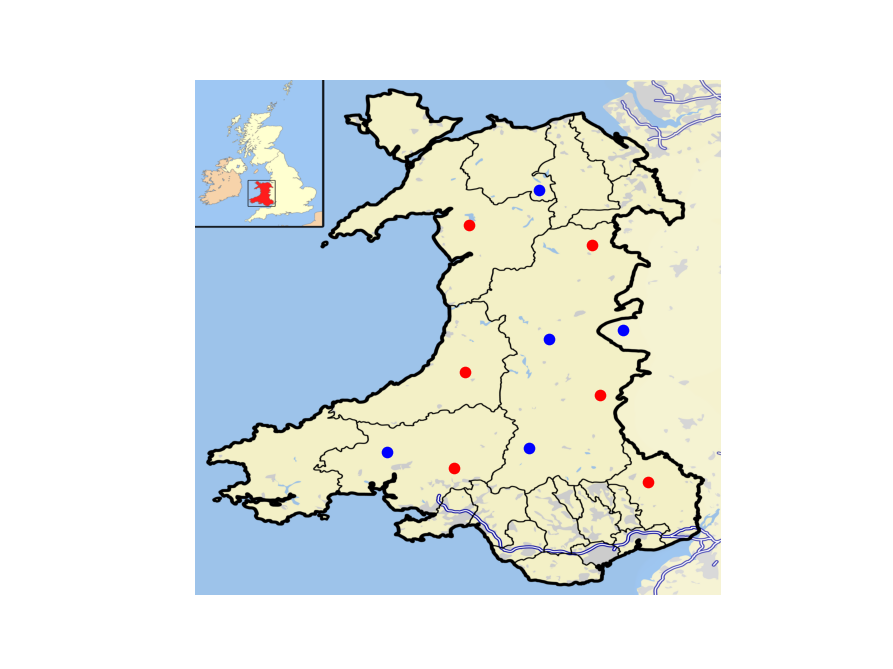

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.backend_bases import MouseButton
import pandas as pd

 
print("\n")                               
print("Left Click to add a Helicopter, Right Click to add a Car")

fig1, ax = plt.subplots()
ax.set_xlim(-5,51)
ax.set_ylim(-2,53)
img = plt.imread('Wales.png');

ax.imshow(img, extent=[-5, 51, -2, 53])
plt.axis("off")

coords = []



def Helicopter(event):
    
    if event.button == 1:
        x, y = event.xdata, event.ydata    
        global coords
        coords.append((x, y, 0))
        ax.scatter([x], [y], c='#FF0000', s=25)
        fig1.draw()
    
    elif event.button == 3:
        x, y = event.xdata, event.ydata    
        coords.append((x, y, 1))
        ax.scatter([x], [y], c='#0000FF'
                   , s=25)
        fig1.draw()

cid = fig1.canvas.mpl_connect('button_press_event', Helicopter)

fig1.show()

In [2]:
plt.close(fig1)

In [3]:
coords

[(24.23759905497233, 37.494047619047606, 0),
 (37.332837150210416, 35.41071428571428, 0),
 (23.79117048354376, 21.869047619047613, 0),
 (38.22569429306756, 19.339285714285708, 0),
 (22.60069429306757, 11.601190476190474, 0),
 (43.28521810259137, 10.113095238095234, 0),
 (32.71974191211519, 25.29166666666666, 1),
 (15.45783715021043, 13.238095238095234, 1),
 (30.636408578781854, 13.684523809523807, 1),
 (40.606646674019956, 26.333333333333325, 1),
 (31.678075245448518, 41.21428571428571, 1)]

In [4]:
Coords_df = pd.DataFrame(coords,columns=['XPos','YPos','Type'])
print (Coords_df)

         XPos       YPos  Type
0   24.237599  37.494048     0
1   37.332837  35.410714     0
2   23.791170  21.869048     0
3   38.225694  19.339286     0
4   22.600694  11.601190     0
5   43.285218  10.113095     0
6   32.719742  25.291667     1
7   15.457837  13.238095     1
8   30.636409  13.684524     1
9   40.606647  26.333333     1
10  31.678075  41.214286     1


In [5]:
DT_X_Values = Coords_df.drop(['Type'],axis=1)
X = DT_X_Values.to_numpy().tolist()
X = np.array(X)

In [6]:
X

array([[24.23759905, 37.49404762],
       [37.33283715, 35.41071429],
       [23.79117048, 21.86904762],
       [38.22569429, 19.33928571],
       [22.60069429, 11.60119048],
       [43.2852181 , 10.11309524],
       [32.71974191, 25.29166667],
       [15.45783715, 13.23809524],
       [30.63640858, 13.68452381],
       [40.60664667, 26.33333333],
       [31.67807525, 41.21428571]])

In [7]:
DT_Y_Values = Coords_df.drop(['XPos'],axis=1)
DT_Y_Values = DT_Y_Values.drop(['YPos'],axis=1)
y = DT_Y_Values.to_numpy().ravel()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree


h = .01  # step size in the mesh
# X = StandardScaler().fit_transform(X)


clf = ExtraTreesClassifier(n_estimators = 100)
clf.fit(X, y)

x_min, x_max = -5, 51 
y_min, y_max = -2, 53


xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))


Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Z = Z.reshape(xx.shape)



f, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.6,
   edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.contourf(xx, yy, Z, cmap=cm, alpha=.4)
img = plt.imread('Wales.png');

ax.imshow(img, extent=[-5, 51, -2, 53])

plt.plot()

plt.show()
